In [33]:
import textwrap
import pandas as pd
import pickle
import seaborn as sns

In [2]:
with open('conversationframe.pkl','rb') as input:
    conversationframe = pickle.load(input)

In [11]:
def find_engagement(string_tag, user_id, announcement,conversationlist):
    mentioned = 0
    participated = 0

    temp_m = False
    temp_p = False
    if announcement == False:
        for i in conversationlist:
            for index,j in i.iterrows():
                if string_tag in j['text'].lower():
                    temp_m = True
                if j['user_id'] == user_id and pd.notnull(j['in_reply_to_status_id']):
                    temp_p = True
            if temp_m == True:
                mentioned += 1
                temp_m = False
            if temp_p == True:
                participated += 1
                temp_p = False
    else:
        for i in conversationlist:
            for j in i:
                if string_tag in j['text'].lower():
                    temp_m = True
                if j['user_id'] == user_id:
                    temp_p = True
            if temp_m == True:
                mentioned += 1
                temp_m = False
            if temp_p == True:
                participated += 1
                temp_p = False
    return (participated/mentioned)*100, [mentioned, participated]

In [4]:
convlist = conversationframe['conv'].to_list()

In [13]:
#KLM 56377143
#AirFrance 106062176
#British_Airways 18332190
#AmericanAir 22536055
#Lufthansa 124476322
#AirBerlin 26223583
#AirBerlin assist 2182373406
#easyJet 38676903
#RyanAir 1542862735
#SingaporeAir 253340062
#Qantas 218730857
#EtihadAirways 45621423


KLM = find_engagement('@klm',56377143,False,convlist)
AF = find_engagement('@airfrance',106062176,False,convlist)
BA = find_engagement('@british_airways',18332190,False,convlist)
LH = find_engagement('@lufthansa',124476322,False,convlist)
EJ = find_engagement('@easyjet',38676903,False,convlist)

In [15]:
airlinelist = [KLM,AF,BA,LH,EJ]
part = []
nonpart = []


for i in airlinelist:
    part.append(i[0])
    nonpart.append(100-i[0])

In [17]:
airlines = pd.DataFrame()

In [19]:
airlines['part'] = part
airlines['nonpart'] = nonpart
airlines['airline'] = ['KLM','AirFrance','British_Airways','Lufthansa','EasyJet']

Text(0.5, 0, 'Airlines')

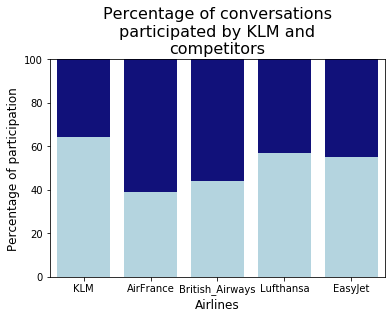

In [39]:
# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="airline",  y=100, data=airlines, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="airline", y="part", data=airlines, color='lightblue')

bar2.set_ylim(0,100)
bar2.set_title(textwrap.fill('Percentage of conversations participated by KLM and competitors',30),fontsize=16)
bar2.set_ylabel('Percentage of participation',fontsize=12)
bar2.set_xlabel('Airlines',fontsize=12)

In [25]:
airlines

,part,nonpart,airline
0,64.181767,35.818233,KLM
1,39.092172,60.907828,AirFrance
2,43.932567,56.067433,British_Airways
3,57.096425,42.903575,Lufthansa
4,55.191100,44.808900,EasyJet
